# **LOANTAP BUSINESS CASE STUDY**

## **PROBLEM STATEMENT**

---

LoanTap is an online lending platform that provides customized personal loan products to salaried individuals and small business owners. In order to minimize credit risk and improve loan portfolio quality, LoanTap aims to strengthen its underwriting process using data-driven techniques.

The objective of this project is to build a Logistic Regression model that predicts whether a borrower is likely to fully repay the loan or default, based on their demographic, financial, employment, and credit history attributes.

Using historical loan data, this study will:

- Analyze borrower behavior through Exploratory Data Analysis (EDA),

- Identify key factors influencing loan repayment,

- Develop a predictive model to classify customers as low-risk or high-risk,

- Evaluate model performance using appropriate classification metrics,

- Provide actionable business recommendations for improving loan approval decisions.

The ultimate goal is to help LoanTap **reduce Non-Performing Assets (NPAs)** while **ensuring sustainable growth** by extending credit to financially reliable customers.

## **MODULES' IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA UPLOAD**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.shape # (rows, columns)

(396030, 27)

*The LoanTap dataset contains 396,030 rows and 27 columns, indicating a large-scale dataset with sufficient observations for building a robust predictive model.*

*This large sample size helps in improving the generalization ability of the machine learning model.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

***Target Variable: loan_status***

*It represents the current status of the loan and indicates whether a borrower has fully paid the loan or defaulted.*

*This variable will be converted into a binary format for Logistic Regression modeling.*

*The presence of multiple categorical variables indicates the need for encoding techniques before model building.*

In [ ]:
df.isna().sum() #

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


*The highest missing values are observed in:*

- *mort_acc*

- *emp_title*

- *emp_length*

*These features will require appropriate imputation techniques during data preprocessing.*

## **EXPLORATORY DATA ANALYSIS (EDA):**

### **STATISTICAL SUMMARY OF NUMERIC VARIABLES**

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


1.  ***Loan Amount***: *Most loans lie between ₹8,000 and ₹20,000, indicating moderate loan sizes. The presence of higher values suggests some large-ticket loans*.

2.  ***Interest Rate***: *Wide variation in interest rates reflects risk-based pricing. Higher rates may indicate riskier borrowers*.

3.  ***Installment***: *Installments increase with loan amount and tenure. High installments may increase default risk*.

4.  ***Annual Income***: *The large difference between mean and max indicates presence of extreme outliers. Income distribution is highly right-skewed*.

5.  ***Debt-to-Income Ratio***: *Extremely high maximum value indicates possible outliers or data errors. DTI values need capping or treatment*.

6.  ***Open Accounts***: *Most borrowers have a moderate number of open accounts, while few have very high exposure*.

7.  ***Public Records***: *Majority of borrowers have no public derogatory records. A small portion has high risk profiles*.

8.  ***Revolving Balance***: *High maximum indicates presence of significant outliers*.

9.  ***Revolving Utilization***: *Values above 100% suggest possible anomalies and require cleaning*.

***Overall Observations:***

- *Many variables show **right-skewness***.

- *Presence of extreme outliers in: **annual_inc, dti, revol_bal and revol_util**; these variables require outlier treatment*.

- *Scaling is necessary before model building*.

### **TARGET VARIABLE ANALYSIS**

*The target variable in this study is loan_status, which represents the repayment status of the borrower. It indicates whether a customer has successfully repaid the loan or has defaulted.*

*Understanding the distribution of the target variable is essential to identify class imbalance and its impact on model performance.*

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,318357
Charged Off,77673


In [ ]:
df['loan_status'].value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


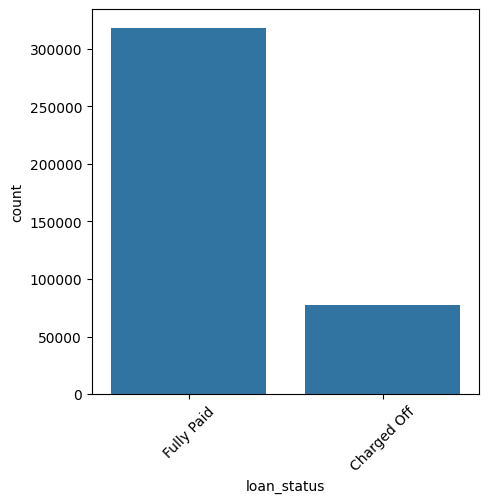

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='loan_status', data=df)
plt.xticks(rotation=45)
plt.show()

*The distribution of the target variable loan_status shows that **out of 396,030 loans, 80.39% were Fully Paid, 19.61% were Charged Off***.

*This indicates that the majority of LoanTap’s customers successfully repay their loans, reflecting a generally healthy and stable loan portfolio.*

*At the same time, the dataset shows a moderate class imbalance, with **non-defaulters** forming the **dominant group**. While this is desirable from a business perspective, it requires **careful model evaluation to ensure that defaulters are not overlooked***.

*Therefore, **in addition to accuracy, evaluation metrics such as Recall, Precision, F1-score, and ROC-AUC will be emphasized** to ensure effective identification of high-risk borrowers*.

*The **count plot** further confirms the dominance of fully paid loans over charged-off loans.*

### **UNIVARIATE ANALYSIS**

#### **Continuous Variables**

- **Loan Amount**

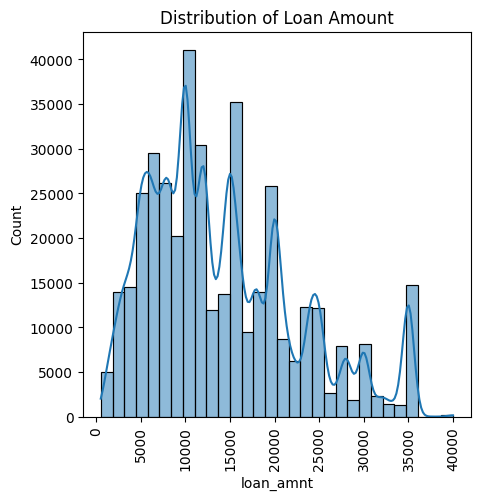

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xticks(rotation=90)
plt.show()

- *The distribution of loan amount is right-skewed, with most loans concentrated between ₹5,000 and ₹20,000. A smaller proportion of borrowers have taken high-value loans up to ₹40,000. This indicates that LoanTap primarily caters to small-to-medium ticket borrowers.*

- **Interest Rate**

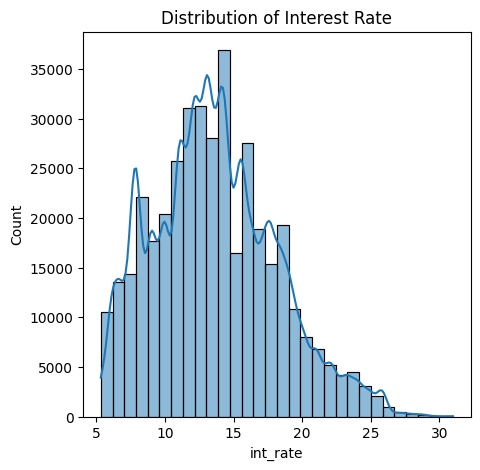

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['int_rate'], bins=30, kde=True)
plt.title("Distribution of Interest Rate")
plt.show()

- *Interest rates are mainly concentrated between 8% and 18%, with a right-skewed distribution. Higher interest rates above 25% are relatively rare and are likely associated with high-risk borrowers.*

- **Annual Income**

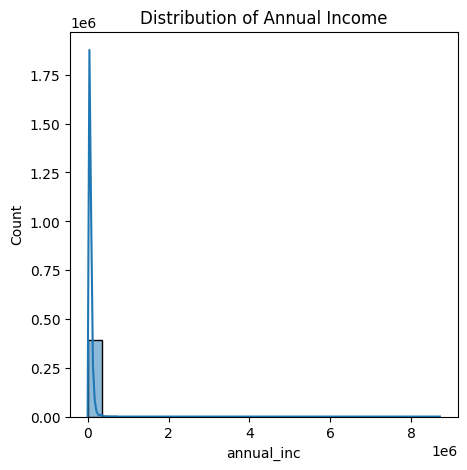

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['annual_inc'], bins=25, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

- *Annual income shows a highly right-skewed distribution with extreme outliers. Most borrowers earn below ₹1,00,000 annually, while a few customers report very high incomes. The presence of outliers justifies the need for outlier treatment.*

- **DTI**

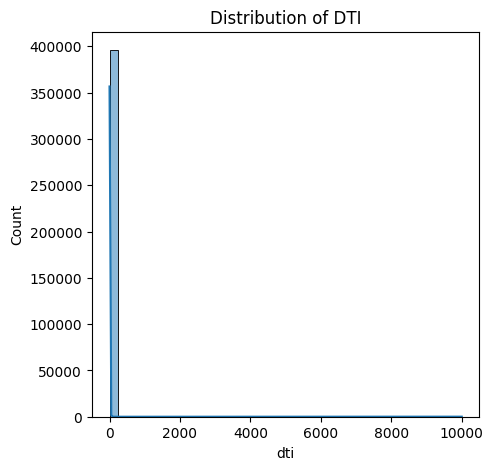

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['dti'], bins=40, kde=True)
plt.title("Distribution of DTI")
plt.show()

- *DTI values are heavily concentrated at lower ranges, with extreme values extending up to 9999. This indicates possible data anomalies or rare high-risk borrowers and requires appropriate capping.*

#### **Categorical / Discrete**

- **Grade**

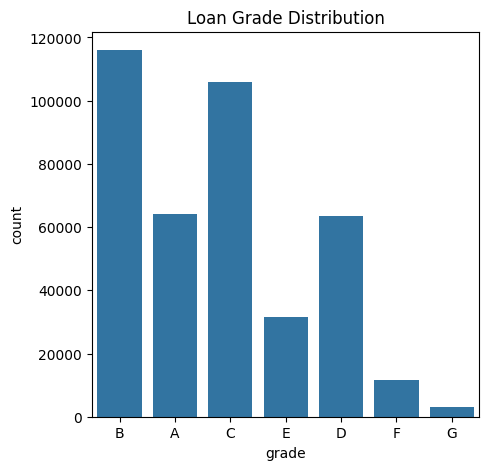

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='grade', data=df)
plt.title("Loan Grade Distribution")
plt.show()

- *Grades B and C form the largest proportion of loans, followed by A and D. Very few customers fall under grades F and G, indicating that LoanTap maintains strict credit standards.*

- **Home Ownership**

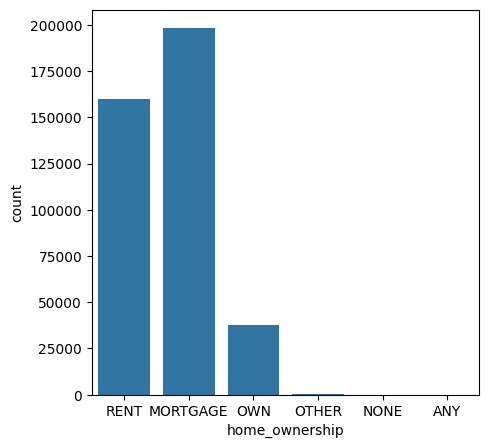

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='home_ownership', data=df)
plt.show()

- *Most borrowers either live in rented houses or have mortgage-backed homes. A smaller proportion owns their homes, while very few belong to other categories.*

- **Purpose**

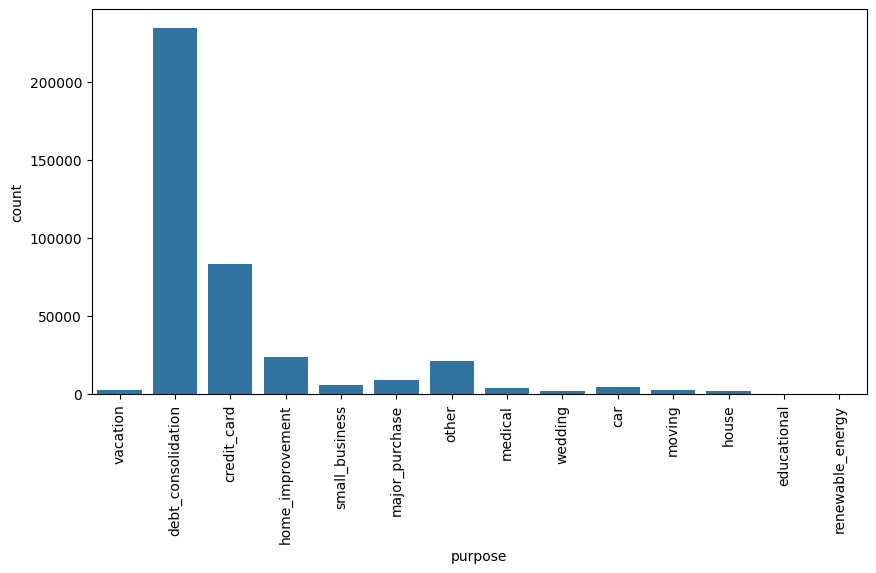

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', data=df)
plt.xticks(rotation=90)
plt.show()

- *Debt consolidation is the most common purpose, followed by credit card repayment and home improvement. This suggests that most borrowers use personal loans for managing existing liabilities.*

---

***Overall Observations***

- *Most numerical variables are right-skewed.*

- *Significant outliers exist in income and DTI.*

- *Majority of customers belong to moderate-risk grades.*

- *Borrowers primarily use loans for debt restructuring.*

*These observations guide further data preprocessing and feature engineering steps.*

### **BIVARIATE ANALYSIS**

***Note**: Variables such as **annual_inc** and **dti** contained **extreme outliers**, which distorted their visual interpretation. Therefore, values were **capped at the 99th percentile** for visualization purposes. This allowed clearer comparison between defaulters and non-defaulters while retaining most data points.*

- **Loan Amount vs Loan Status**

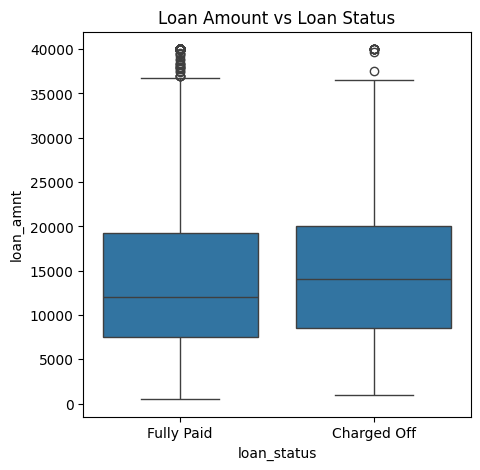

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

- *The median loan amount for charged-off customers is slightly higher than that of fully paid customers. This suggests that borrowers taking relatively higher loan amounts tend to have a greater risk of default. Larger exposure may increase repayment pressure.*

- **Interest Rate vs Loan Status**

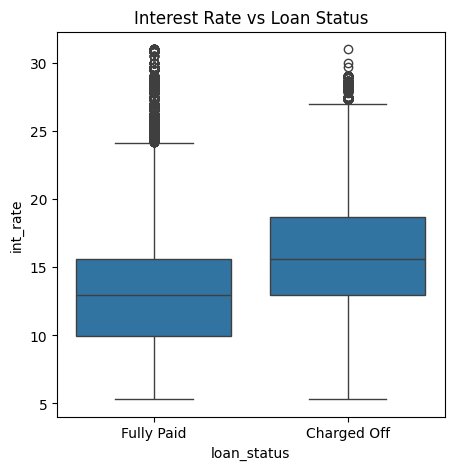

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title("Interest Rate vs Loan Status")
plt.show()

- *Charged-off loans have a noticeably higher median interest rate compared to fully paid loans. This indicates that high-risk borrowers are charged higher interest, and such customers are more likely to default. Interest rate is therefore a strong risk indicator.*

- **Annual Income vs Loan Status**

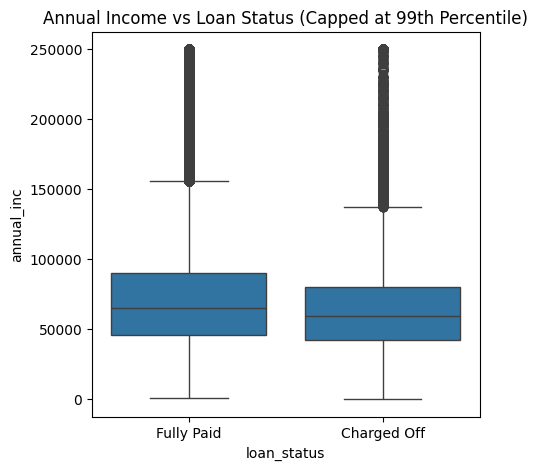

In [ ]:
inc_cap = df['annual_inc'].quantile(0.99)

plt.figure(figsize=(5,5))
sns.boxplot(x='loan_status', y=df['annual_inc'].clip(upper=inc_cap), data=df)
plt.title("Annual Income vs Loan Status (Capped at 99th Percentile)")
plt.show()

- *After outlier treatment, fully paid borrowers show slightly higher median income than defaulters. This suggests that stable and higher income improves repayment capacity and reduces default risk.*

- **DTI vs Loan Status**

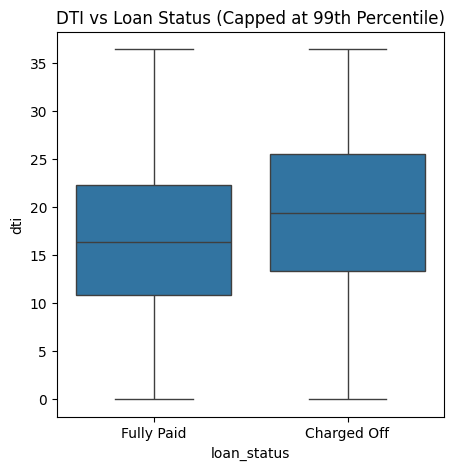

In [ ]:
dti_cap = df['dti'].quantile(0.99)

plt.figure(figsize=(5,5))
sns.boxplot(x='loan_status', y=df['dti'].clip(upper=dti_cap), data=df)
plt.title("DTI vs Loan Status (Capped at 99th Percentile)")
plt.show()

- *Charged-off borrowers generally exhibit higher DTI values than fully paid customers. This implies that borrowers with higher existing debt burdens are more prone to default due to financial stress.*

- **Grade vs Loan Status**

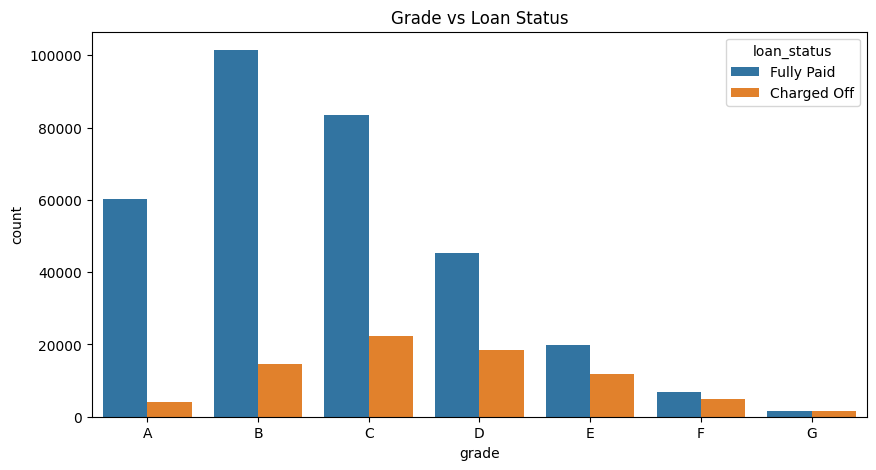

In [ ]:
grade_order = sorted(df['grade'].unique())

plt.figure(figsize=(10,5))
sns.countplot(x='grade', hue='loan_status', data=df, order=grade_order)
plt.title("Grade vs Loan Status")
plt.show()

- *Lower grades (D to G) show a higher proportion of charged-off loans compared to higher grades (A and B). This confirms that LoanTap’s internal credit grading system is effective in differentiating borrower risk levels.*

- **Home Ownership vs Loan Status**

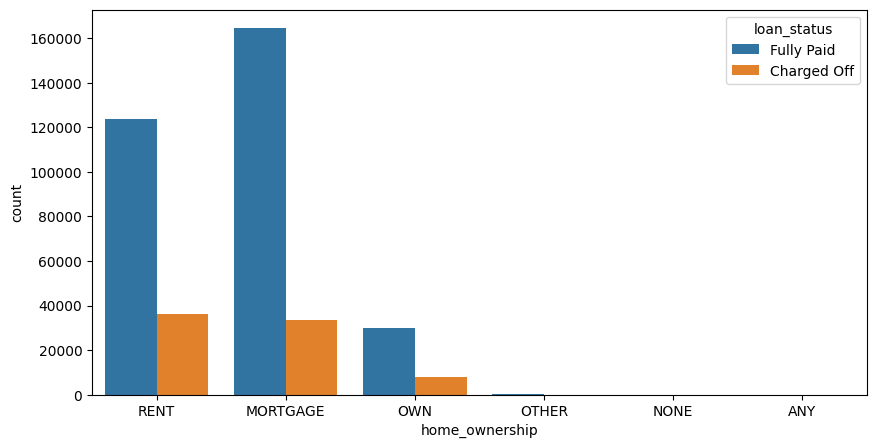

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.show()

- *Borrowers with mortgage and owned homes tend to have better repayment performance compared to renters. This suggests that asset ownership and residential stability are positively associated with creditworthiness.*

- **Verification Status vs Loan Status**

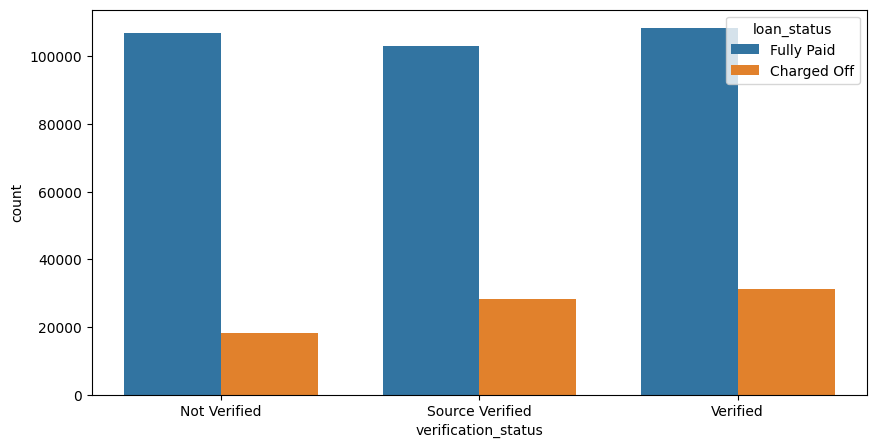

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='verification_status', hue='loan_status', data=df, width=0.75)
plt.show()

- *Verified and source-verified borrowers have relatively lower default rates compared to non-verified customers. This highlights the importance of income verification in reducing credit risk.*

- **Purpose vs Loan Status**

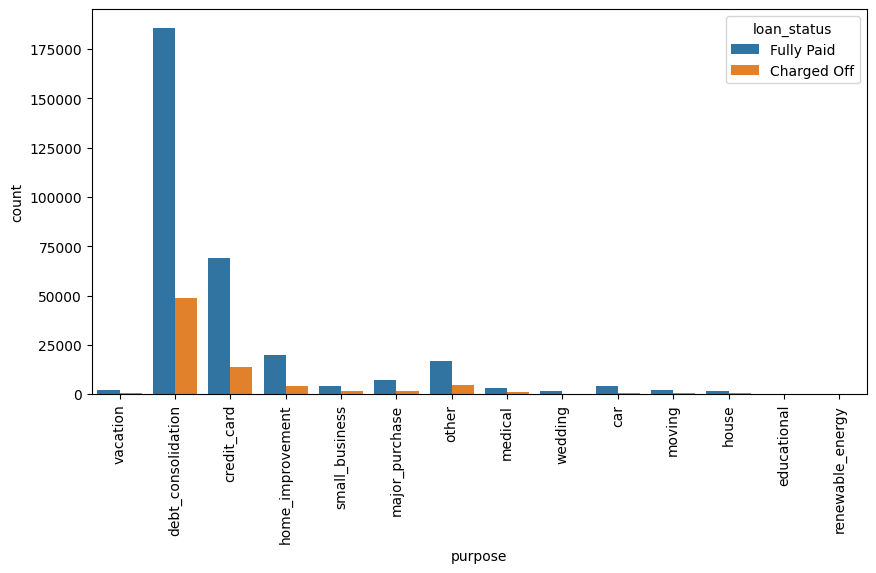

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

- *Loans taken for debt consolidation and credit card repayment account for the highest number of defaults. This indicates that borrowers seeking loans to manage existing liabilities may already be under financial stress.*

## **DATA PREPROCESSING**


### **DUPLICATE HANDLING**


In [ ]:
df.duplicated().sum() # no duplicate entries were found in the dataset.

np.int64(0)

### **MISSING VALUE TREATMENT**

In [ ]:
# Categorical
df['emp_title'] = df['emp_title'].fillna('Unknown')
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])

# Numerical
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())

*Missing values were treated using appropriate imputation techniques. Categorical variables were filled using mode or a separate category, while numerical variables were imputed using median values to reduce the impact of outliers.*

### **MISSING VALUE TREATMENT**

In [ ]:
def cap_outliers(col):
    lower = col.quantile(0.01)
    upper = col.quantile(0.99)
    return col.clip (lower, upper)

for col in ['annual_inc','dti','revol_bal','revol_util']:
    df[col] = cap_outliers(df[col])

*Extreme outliers were treated using percentile capping at the 1st and 99th percentiles to reduce their influence on model performance.*

### **FEATURE ENGINEERING**

In [ ]:
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x>1 else 0)
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x>1 else 0)
df['bankrupt_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x>1 else 0)

*Binary flags were created to capture high-risk patterns in public records, mortgage accounts, and bankruptcies.*

### **TARGET VARIABLE ENCODING**

In [ ]:
df['loan_status_binary'] = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

### **DROP IRRELEVANT COLUMNS**

In [ ]:
df.drop(['address','emp_title','title','issue_d','earliest_cr_line','loan_status'], axis=1, inplace=True)

*High-cardinality and non-predictive features were removed to avoid noise and dimensionality issues.*

### **ENCODING CATEGORICAL VARIABLES**

In [ ]:
df = pd.get_dummies(df, drop_first=True)

### **TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status_binary', axis=1)
y = df['loan_status_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Numerical features were standardized using StandardScaler to ensure uniform contribution during model training.*

*Data preprocessing involved missing value imputation, outlier treatment, feature engineering, encoding of categorical variables, and scaling of numerical features. These steps ensured that the dataset was clean, consistent, and suitable for logistic regression modeling.*

---

## **LOGISTIC REGRESSION MODELING**

### **DEFINE FEATURES & TARGET**

In [ ]:
X = df.drop('loan_status_binary', axis=1)
y = df['loan_status_binary']

### **TRAIN-TEST SPLIT (STRATIFIED)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **TRAIN LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### **MODEL COEFFICIENTS**

In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns,'Coefficient': log_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
coef_df.head(10)

,Feature,Coefficient
17,grade_C,0.632969
18,grade_D,0.618881
19,grade_E,0.512658
16,grade_B,0.455555
20,grade_F,0.353932
35,sub_grade_C5,0.288923
34,sub_grade_C4,0.278098
39,sub_grade_D4,0.273421
40,sub_grade_D5,0.260562
33,sub_grade_C3,0.259283


*A Logistic Regression model was developed to classify borrowers into defaulters and non-defaulters based on their financial and demographic attributes*.

*The dataset was divided into training and testing sets in an 80:20 ratio using stratified sampling to preserve class distribution. Numerical variables were standardized before model training*.

*The model was trained using the scikit-learn Logistic Regression algorithm. Feature coefficients were analyzed to understand the impact of different variables on loan default*.

## **MODEL EVALUATION**

### **MAKE PREDICTIONS**

In [ ]:
# Predict class
y_pred = log_model.predict(X_test_scaled)

# Predict probability
y_prob = log_model.predict_proba(X_test_scaled)[:,1]

### **CONFUSION MATRIX**

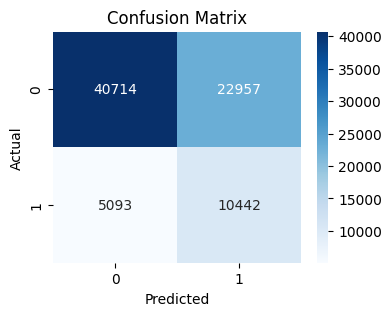

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

***Interpretation:***

*The model correctly classifies a large number of non-defaulters (62,891).*

*However, it fails to identify a significant number of defaulters (14,579), leading to high false negatives.*

*Missing defaulters is risky for the bank as it increases NPAs.*

*False positives (780) are relatively low, indicating fewer good customers are rejected*.

*This shows that the current model is conservative and biased towards predicting customers as safe.*

### **CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74     63671
           1       0.31      0.67      0.43     15535

    accuracy                           0.65     79206
   macro avg       0.60      0.66      0.59     79206
weighted avg       0.78      0.65      0.68     79206



***Interpretation:***

*The model performs very well in identifying fully paid customers (Recall = 0.99).*

*However, it performs poorly in detecting defaulters (Recall = 0.06)*.

*Only 6% of actual defaulters are correctly identified.*

*Although accuracy is high (81%), it is misleading due to class imbalance*.

*Low F1-score for defaulters indicates weak risk detection capability*.

*Thus, accuracy alone is not a reliable metric in this context*.

### **ROC CURVE & AUC**

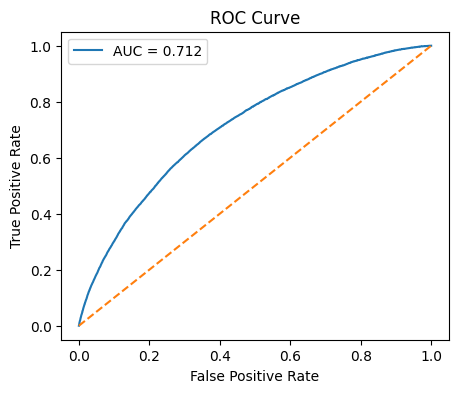

np.float64(0.7115124626542008)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label='AUC = %.3f' % auc_score)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc_score

***Interpretation:***

*An AUC of 0.712 indicates moderate discriminatory power.*

*The model is able to distinguish defaulters from non-defaulters better than random guessing.*

*However, there is scope for improvement through threshold tuning and advanced modeling.*

### **PRECISION-RECALL CURVE**

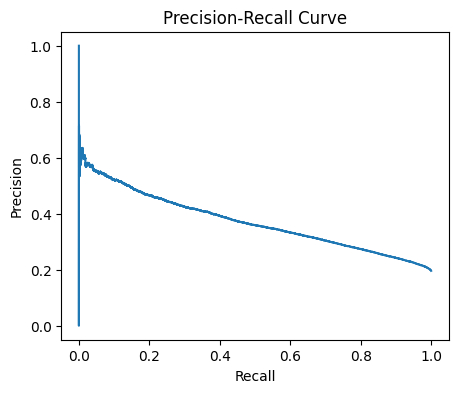

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

*The Precision-Recall curve shows that precision decreases as recall increases. Achieving higher recall (catching more defaulters) leads to lower precision (more false alarms).*

*This reflects the inherent tradeoff between minimizing NPAs and avoiding rejection of good customers.*

---

***Overall Model Performance Summary***

- *The model strongly favors predicting customers as non-defaulters.*

- *Default detection performance is weak at the default threshold (0.5).*

- *Accuracy is inflated due to class imbalance.*

- *ROC-AUC indicates reasonable learning capability*.

- *Recall for defaulters requires significant improvement*.

## **TRADE-OFF QUESTIONS**

### **Q1: How can we ensure detection of real defaulters with fewer false positives?**

***To improve detection of real defaulters, the following steps can be adopted:***

- *Lower the probability threshold below 0.5 to classify more customers as defaulters.*

- *Use class-weighted Logistic Regression to penalize misclassification of defaulters.*

- *Focus on optimizing Recall during model tuning.*

- *Introduce cost-sensitive learning.*

- *Combine model predictions with manual verification for borderline cases.*

*These steps help increase recall while controlling false positives*.

### **Q2: Since NPA is critical, how should the bank play safe?**

***To minimize NPAs, the bank should adopt a conservative lending strategy:***

- *Prioritize Recall over Accuracy.*

- *Apply stricter approval criteria for high-risk profiles.*

- *Offer lower loan amounts to risky customers.*

- *Use risk-based pricing.*

- *Conduct enhanced background checks for flagged customers.*

*This ensures financial stability while controlling credit risk.*.







## **ACTIONABLE INSIGHTS**

*Based on exploratory analysis, model results, and evaluation metrics, the following insights and recommendations are proposed for LoanTap’s underwriting process.*

- *Interest rate and loan grade are strong indicators of default risk. **Lower-grade loans (D–G) show significantly higher default rates**.*

- ***Borrowers with high Debt-to-Income (DTI) ratios are more likely to default**, indicating financial stress.*

- *Customers with **lower annual income** demonstrate relatively **weaker repayment performance**.*

- *Income verification plays an important role, as **verified borrowers show lower default rates**.*

- *Loans taken for **debt consolidation** and **credit card repayment** exhibit **higher default frequencies**.*

- *Home ownership status is associated with repayment behavior, with mortgage and **home-owned borrowers performing better**.*

- ***The current model shows strong performance in identifying safe customers but weak performance in detecting defaulters.***

- ***Class imbalance** leads to **inflated accuracy** and requires special handling.*

## **BUSINESS RECOMMENDATIONS**

*Implement **risk-based pricing** by assigning higher interest rates to high-risk borrowers and competitive rates to low-risk customers.*

- ***Prioritize recall** during model deployment to ensure maximum detection of potential defaulters.*

- *Introduce **lower credit limits for high-risk borrowers** with high DTI and low income.*

- *Enforce **stricter verification procedures** for unverified applicants.*

- ***Flag customers with high revolving utilization and multiple public records** for manual review.*

- *Apply **probability threshold tuning** to improve default detection.*

- ***Combine** machine learning **predictions** with human underwriting for borderline cases.*

- ***Regularly retrain the model using updated customer data** to maintain performance.*

## **QUESTIONNAIRE - ANSWERS**

1.  ***What percentage of customers have fully paid their Loan Amount?** Approximately 80.39% of customers have fully paid their loan amount.*

2.  ***Comment on the correlation between Loan Amount and Installment features.** Loan amount and installment show a strong positive correlation, as installment directly depends on the principal amount and loan tenure.*

3.  ***The majority of people have home ownership as _______.** The majority of borrowers belong to the Mortgage category, followed by Rent.*

4.  ***People with grades ‘A’ are more likely to fully pay their loan. (T/F)** True - Grade A borrowers show a higher proportion of fully paid loans compared to lower grades.*

5.  ***Name the top 2 afforded job titles.** The two most common job titles are typically: Teacher and Manager*

6. ***Thinking from a bank's perspective, which metric should our primary focus be on?** Recall - Recall is critical to ensure that maximum defaulters are identified and NPAs are minimized.*

7.  ***How does the gap in precision and recall affect the bank?** A large gap between precision and recall indicates either excessive rejection of good customers or failure to detect defaulters. Low recall increases NPAs, while low precision reduces business opportunities.*

8.  ***Which were the features that heavily affected the outcome?** Loan grade (C–F), sub-grade (C3–D5), interest rate, and financial burden indicators were the most influential features.*

9.  ***Will the results be affected by geographical location? (Yes/No)** Yes - Geographical factors influence income levels, employment stability, and cost of living, which can affect repayment capacity.*



---

---

---